# Linear regression with one variable

Week2のLinear regressionの課題について

In [139]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Plotting the Data

In [140]:
df_train = pd.read_csv("ex1data1.txt", names=('population', 'profit'))
df_train.head(5)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


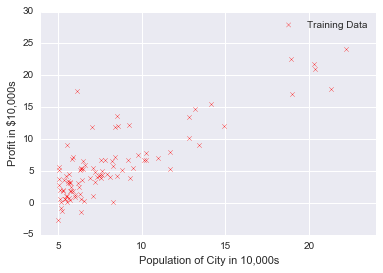

In [141]:
fig = plt.figure()
plt.xlim(4, 24)
plt.ylim(-5, 30)

ax = fig.add_subplot(1,1,1)
ax.scatter(df_train['population'], df_train['profit'],
           color='red', marker='x', label='Training Data')
ax.legend()
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

## Computing the cost J(theta)

In [142]:
%run linear_regression.py

In [143]:
X = np.array(df_train['population'])
X = np.c_[np.ones((len(X), 1)), X]

y = np.array(df_train['profit'])
y = y.reshape(len(y), 1)

theta = np.zeros((X.shape[1],1))

In [144]:
compute_cost(X, y, theta)

32.072733877455676

## Gradient descent

In [145]:
iterations = 1500
alpha = 0.01
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

In [146]:
theta

array([[-3.63029144],
       [ 1.16636235]])

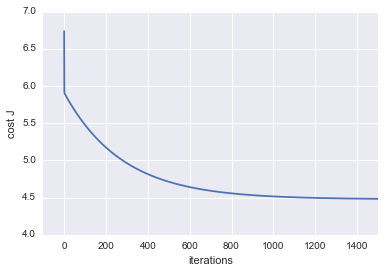

In [147]:
fig = plt.figure()
plt.xlim(-100, 1500)

ax = fig.add_subplot(1,1,1)
ax.plot(J_history)
ax.set_xlabel('iterations')
ax.set_ylabel('cost J')

In [148]:
predict1 = np.dot(np.array([1, 3.5]), theta)
predict2 = np.dot(np.array([1, 7]), theta)
predict1 * 10000, predict2 * 10000

(array([ 4519.7678677]), array([ 45342.45012945]))

In [149]:
y_pred = (np.dot(X, theta).T)[0]

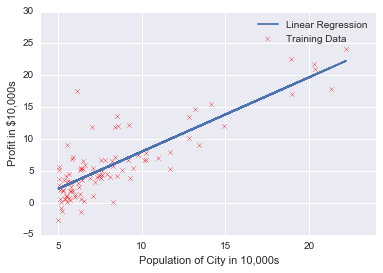

In [150]:
fig = plt.figure()
plt.xlim(4, 24)
plt.ylim(-5, 30)

ax = fig.add_subplot(1,1,1)
ax.plot(X[:,1], y_pred, label='Linear Regression')
ax.scatter(X[:,1], y, color='red', marker='x', label='Training Data')
ax.legend()
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

## Visualizing J(theta)

In [151]:
gridsize = 100
theta0_vals = np.linspace(-10, 10, gridsize)
theta1_vals = np.linspace(-1, 4, gridsize)
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

J_vals = np.zeros((gridsize, gridsize))
for i in range(gridsize):
    for j in range(gridsize):
        t = np.array([theta0_vals[i, j], theta1_vals[i, j]]).reshape(2, 1)
        J_vals[i, j] = compute_cost(X, y, t)

In [152]:
compute_cost(X, y, theta), np.min(J_vals) # J_valsの検算

(4.483388256587725, 4.4804593918933131)

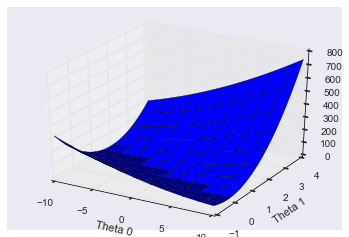

In [153]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')

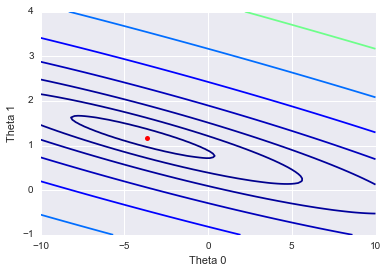

In [154]:
fig = plt.figure()
plt.jet()

ax = fig.add_subplot(1,1,1)
ax.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-3, 3, 20)) # 最後の引数は等高線の間隔
ax.plot(theta[0], theta[1], 'k.', color='red', markersize='10') # Jを最適にするThetaをプロット
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')